<a href="https://colab.research.google.com/github/lsmanoel/database_tactilus/blob/master/selfOrganizationMaps_IzacDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minimalistic implementation of the Self Organizing Maps (SOM)

[MiniSom Home Page](https://github.com/JustGlowing/minisom) 

[Introduction to Self-Organizing Maps (SOMs)](https://heartbeat.fritz.ai/introduction-to-self-organizing-maps-soms-98e88b568f5d)

In [2]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.1.9-cp36-none-any.whl size=6676 sha256=bf109c7e3efb31178d1ae27310cec9ce3700aeb821f429b7a42e492afc362235
  Stored in directory: /root/.cache/pip/wheels/f9/70/2e/5fe380eaea27f5de4843c767908d5221b0f9a12247cfb62de1
Successfully built minisom


In [0]:
from minisom import MiniSom
import pandas as pd
import numpy as np
import os
import glob
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate
import pylab
from pylab import pcolor, colorbar, plot
import random

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
auto_asfalto_path = glob.glob(os.path.join('drive/My Drive/Colab Notebooks/izac/dataset/database_csv/auto_asfalto_csv', '*.csv'))
auto_paralelepipedo_path = glob.glob(os.path.join('drive/My Drive/Colab Notebooks/izac/dataset/database_csv/auto_paralelepipedo_csv', '*.csv'))
manu_asfalto_path = glob.glob(os.path.join('drive/My Drive/Colab Notebooks/izac/dataset/database_csv/manu_asfalto_csv', '*.csv'))
manu_paralelepipedo_path = glob.glob(os.path.join('drive/My Drive/Colab Notebooks/izac/dataset/database_csv/manu_paralelepipedo_csv', '*.csv'))

#===============================================================================  
auto_asfalto_path_list = []
#using enumerate() the value of n_file_found is increment for each file found in file_path
for n_files_found, file_path in enumerate(auto_asfalto_path):
    auto_asfalto_path_list.append(file_path)
n_files_found = n_files_found + 1
print("{} files found!".format(n_files_found))

#===============================================================================  
auto_paralelepipedo_path_list = []
for n_files_found, file_path in enumerate(auto_paralelepipedo_path):
    auto_paralelepipedo_path_list.append(file_path)
n_files_found = n_files_found + 1
print("{} files found!".format(n_files_found))

#===============================================================================  
manu_asfalto_path_list = []
for n_files_found, file_path in enumerate(manu_asfalto_path):
    manu_asfalto_path_list.append(file_path)
n_files_found = n_files_found + 1
print("{} files found!".format(n_files_found))

#===============================================================================  
manu_paralelepipedo_path_list = []
for n_files_found, file_path in enumerate(manu_paralelepipedo_path):
    manu_paralelepipedo_path_list.append(file_path)
n_files_found = n_files_found + 1
print("{} files found!".format(n_files_found))


13 files found!
13 files found!
12 files found!
13 files found!


In [0]:
normalizer = MinMaxScaler(feature_range =(0,1))

# ==============================================================================
auto_asfalto_pd_list = []
auto_asfalto_np_list = []
for n, file_path in enumerate(auto_asfalto_path_list):
    auto_asfalto_pd_list.append(pd.read_csv(file_path))
    auto_asfalto_np_list.append(auto_asfalto_pd_list[-1].values)
    auto_asfalto_np_list[-1] = normalizer.fit_transform(auto_asfalto_np_list[-1])
    
auto_asfalto_dict = {
    'pd':auto_asfalto_pd_list,
    'np':auto_asfalto_np_list,
    'marker':'o',
    'color':'b'
}

# ==============================================================================
auto_paralelepipedo_pd_list = []
auto_paralelepipedo_np_list = []
for n, file_path in enumerate(auto_paralelepipedo_path_list):
    auto_paralelepipedo_pd_list.append(pd.read_csv(file_path))
    auto_paralelepipedo_np_list.append(auto_paralelepipedo_pd_list[-1].values)
    auto_paralelepipedo_np_list[-1] = normalizer.fit_transform(auto_paralelepipedo_np_list[-1])
    
auto_paralelepipedo_dict = {
    'pd':auto_paralelepipedo_pd_list,
    'np':auto_paralelepipedo_np_list,
    'marker':'x',
    'color':'r'
}

# ==============================================================================
manu_asfalto_pd_list = []
manu_asfalto_np_list = []
for n, file_path in enumerate(manu_asfalto_path_list):
    manu_asfalto_pd_list.append(pd.read_csv(file_path))
    manu_asfalto_np_list.append(manu_asfalto_pd_list[-1].values)
    manu_asfalto_np_list[-1] = normalizer.fit_transform(manu_asfalto_np_list[-1])
    
manu_asfalto_dict = {
    'pd':manu_asfalto_pd_list,
    'np':manu_asfalto_np_list,
    'marker':'s',
    'color':'b'
}

# ==============================================================================
manu_paralelepipedo_pd_list = []
manu_paralelepipedo_np_list = []
for n, file_path in enumerate(manu_paralelepipedo_path_list):
    manu_paralelepipedo_pd_list.append(pd.read_csv(file_path))
    manu_paralelepipedo_np_list.append(manu_paralelepipedo_pd_list[-1].values)
    manu_paralelepipedo_np_list[-1] = normalizer.fit_transform(manu_paralelepipedo_np_list[-1])
    
manu_paralelepipedo_dict = {
    'pd':manu_paralelepipedo_pd_list,
    'np':manu_paralelepipedo_np_list,
    'marker':'+',
    'color':'r'
}

**Size of SOM**
according to [Jing Tian et al](https://drive.google.com/open?id=1r-NTmo4G6K0U2z6_bTyzqzG1dsZzbw-i):
$$5\sqrt{N}$$
$$N=853$$
$$5\sqrt{853}\simeq146$$
$$\sqrt{146}\simeq12$$
$$M=12\times12$$
Where **M is the number of neurons**, which is an integer close to the result of the right hand side of the equation, and **N is the number of observations**.
Note, that M is the total number of neurons. If your map is quadratic, then use the square root of M to obtain the number of neurons in one row.

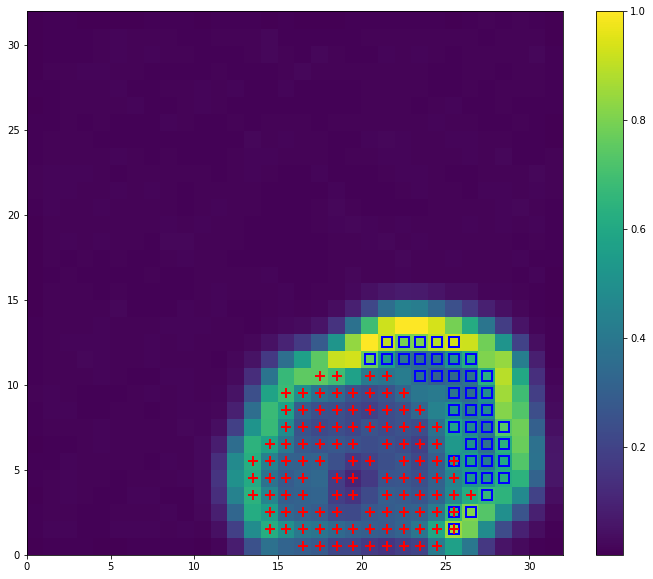

In [0]:
SOM = MiniSom(x = 32, y = 32, input_len = 1024, random_seed = 0)

SOM.random_weights_init(manu_asfalto_pd_list[-1])

SOM.train_random(data = manu_asfalto_dict['np'][-1], num_iteration = 300)
SOM.train_random(data = manu_paralelepipedo_dict['np'][-1], num_iteration = 300)

pylab.figure(figsize=(12, 10))

pcolor(SOM.distance_map().T)
colorbar()

for i, x in enumerate(manu_asfalto_dict['np'][-1]):
    w = SOM.winner(x)
    plot(w[0] + 0.5, 
        w[1] + 0.5,
        manu_asfalto_dict['marker'],
        markerfacecolor = 'None',
        markersize =10,
        markeredgecolor = manu_asfalto_dict['color'],
        markeredgewidth = 2)
    
for i, x in enumerate(manu_paralelepipedo_dict['np'][-1]):
    w = SOM.winner(x)
    plot(w[0] + 0.5, 
        w[1] + 0.5,
        manu_paralelepipedo_dict['marker'],
        markerfacecolor = 'None',
        markersize =10,
        markeredgecolor = manu_paralelepipedo_dict['color'],
        markeredgewidth = 2)

In [12]:
auto_asfalto_dict['np'].shape

AttributeError: ignored

In [22]:
type(manu_asfalto_dict['np'])

list

51


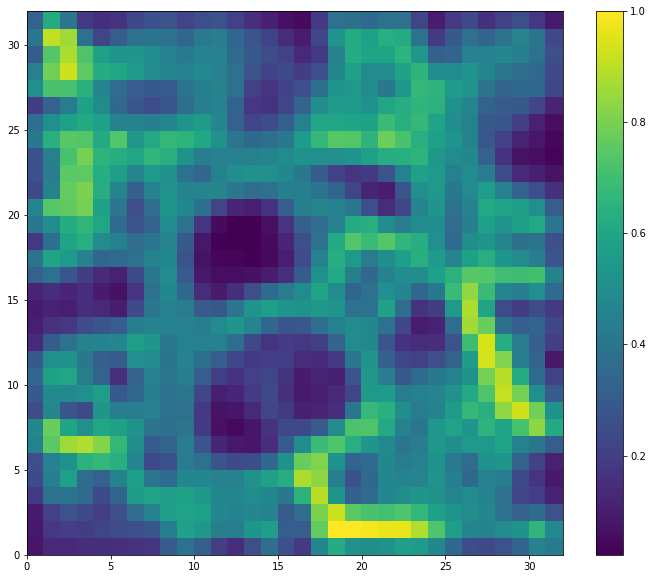

In [34]:
SOM = MiniSom(x = 32, y = 32, input_len = 1024, random_seed = 0)


data_all_list = auto_asfalto_dict['np'] + auto_paralelepipedo_dict['np'] + manu_asfalto_dict['np'] + manu_paralelepipedo_dict['np']

random.shuffle(data_all_list)

#data_all_list.append(auto_asfalto_dict['np'])
#data_all_list.append(auto_paralelepipedo_dict['np'])
#3data_all_list.append(manu_asfalto_dict['np'])
#data_all_list.append(manu_paralelepipedo_dict['np'])

print(len(data_all_list))

for data in data_all_list:
    SOM.train_batch(data = data, num_iteration = 400)
    
pylab.figure(figsize=(12, 10))

pcolor(SOM.distance_map().T)
colorbar()    

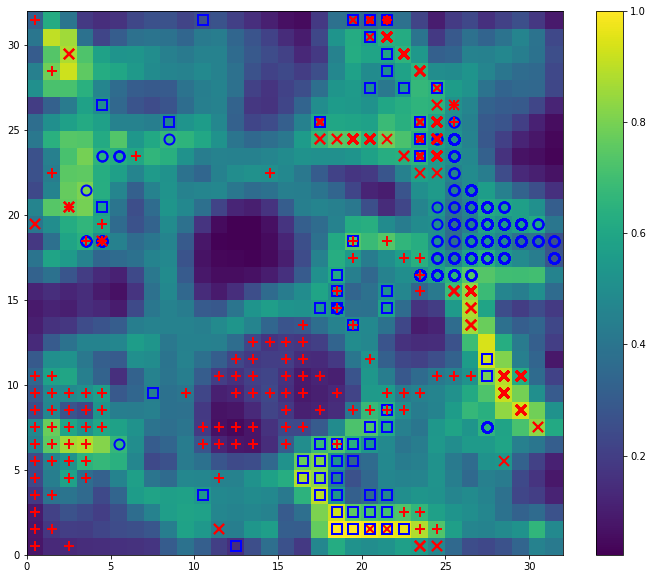

In [35]:
pylab.figure(figsize=(12, 10))

pcolor(SOM.distance_map().T)
colorbar()

for i, x in enumerate(auto_asfalto_dict['np'][0]):
    w = SOM.winner(x)
    plot(w[0] + 0.5, 
        w[1] + 0.5,
        auto_asfalto_dict['marker'],
        markerfacecolor = 'None',
        markersize =10,
        markeredgecolor = auto_asfalto_dict['color'],
        markeredgewidth = 2)
    
for i, x in enumerate(auto_paralelepipedo_dict['np'][0]):
    w = SOM.winner(x)
    plot(w[0] + 0.5, 
        w[1] + 0.5,
        auto_paralelepipedo_dict['marker'],
        markerfacecolor = 'None',
        markersize =10,
        markeredgecolor = auto_paralelepipedo_dict['color'],
        markeredgewidth = 2)
    
for i, x in enumerate(manu_asfalto_dict['np'][0]):
    w = SOM.winner(x)
    plot(w[0] + 0.5, 
        w[1] + 0.5,
        manu_asfalto_dict['marker'],
        markerfacecolor = 'None',
        markersize =10,
        markeredgecolor = manu_asfalto_dict['color'],
        markeredgewidth = 2)
    
for i, x in enumerate(manu_paralelepipedo_dict['np'][0]):
    w = SOM.winner(x)
    plot(w[0] + 0.5, 
        w[1] + 0.5,
        manu_paralelepipedo_dict['marker'],
        markerfacecolor = 'None',
        markersize =10,
        markeredgecolor = manu_paralelepipedo_dict['color'],
        markeredgewidth = 2)

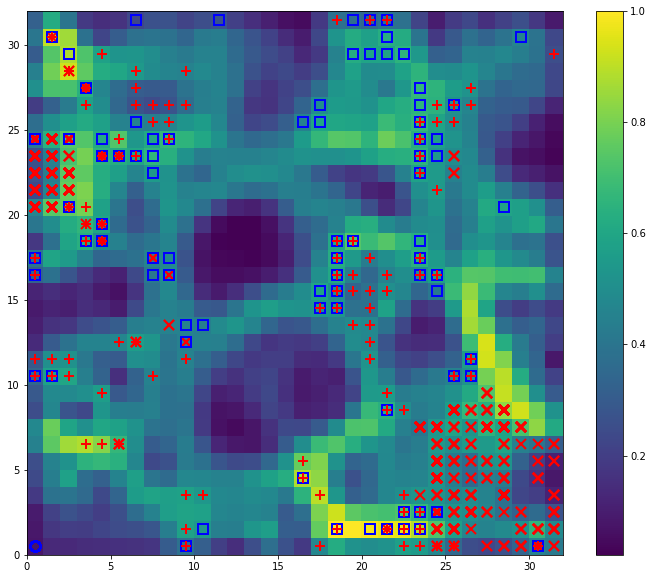

In [36]:
pylab.figure(figsize=(12, 10))

pcolor(SOM.distance_map().T)
colorbar()

for i, x in enumerate(auto_asfalto_dict['np'][-1]):
    w = SOM.winner(x)
    plot(w[0] + 0.5, 
        w[1] + 0.5,
        auto_asfalto_dict['marker'],
        markerfacecolor = 'None',
        markersize =10,
        markeredgecolor = auto_asfalto_dict['color'],
        markeredgewidth = 2)
    
for i, x in enumerate(auto_paralelepipedo_dict['np'][-1]):
    w = SOM.winner(x)
    plot(w[0] + 0.5, 
        w[1] + 0.5,
        auto_paralelepipedo_dict['marker'],
        markerfacecolor = 'None',
        markersize =10,
        markeredgecolor = auto_paralelepipedo_dict['color'],
        markeredgewidth = 2)
    
for i, x in enumerate(manu_asfalto_dict['np'][-1]):
    w = SOM.winner(x)
    plot(w[0] + 0.5, 
        w[1] + 0.5,
        manu_asfalto_dict['marker'],
        markerfacecolor = 'None',
        markersize =10,
        markeredgecolor = manu_asfalto_dict['color'],
        markeredgewidth = 2)
    
for i, x in enumerate(manu_paralelepipedo_dict['np'][-1]):
    w = SOM.winner(x)
    plot(w[0] + 0.5, 
        w[1] + 0.5,
        manu_paralelepipedo_dict['marker'],
        markerfacecolor = 'None',
        markersize =10,
        markeredgecolor = manu_paralelepipedo_dict['color'],
        markeredgewidth = 2)